In [1]:
import Load_and_Save
import Features_extraction
import TrainModels
import Prediction_and_Evaluation
from sklearn.model_selection import train_test_split
import Prediction_and_Evaluation
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package words to /home/hodefi/nltk_data...
[nltk_data]   Package words is already up-to-date!
2023-05-28 20:11:27.696127: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-28 20:11:29.759118: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
import Load_and_Save
# df2 = Load_and_Save.load_from_pqrquet()
df2 = Load_and_Save.load_df("saved_data_frame/df2_include_added_features.pkl")
df2.head()

,request_ts,response_ts,client_token_dec,qname,qtype,answer,nx_domain,l1_cache_hit,response_size,category_id,list_id,is_malicious,File,embedding_bert,euclidean_distance_emmbading,manhattan_distance_emmbading,manhattan_distance,euclidean_distance
0,1678371751940,1678371751940,11335,uk.mail.yahoo.com.,1,"[{'name': 'uk.mail.yahoo.com.', 'ttl': 681, 'c...",0,True,144,,,0,/home/hodefi/projects/DNS_DL/ariel_university_...,"[[0.05091744, -0.024324853, -0.24637453, -0.53...",15.365423,297.103577,297.103577,15.365423
1,1678371751985,1678371751985,40948,us.api.endpoint.ingress.rapid7.com.,1,[{'name': 'us.api.endpoint.ingress.rapid7.com....,0,True,314,,,0,/home/hodefi/projects/DNS_DL/ariel_university_...,"[[-0.024845608, -0.08522413, -0.15028892, -0.3...",14.942669,260.549194,260.549194,14.942669
2,1678371752000,1678371752000,11335,uk.mail.yahoo.com.,1,"[{'name': 'uk.mail.yahoo.com.', 'ttl': 681, 'c...",0,True,144,,,0,/home/hodefi/projects/DNS_DL/ariel_university_...,"[[0.05091744, -0.024324853, -0.24637453, -0.53...",15.365423,297.103577,297.103577,15.365423
3,1678371752012,1678371752022,4338,safebrowsing.googleapis.com.,1,"[{'name': 'safebrowsing.googleapis.com.', 'ttl...",0,True,84,,,0,/home/hodefi/projects/DNS_DL/ariel_university_...,"[[-0.10569315, -0.15762293, -0.2168066, -0.265...",15.249639,287.538696,287.538696,15.249639
4,1678371752043,1678371752043,24955,wepsaprfs01.file.core.windows.net.,1,[{'name': 'wepsaprfs01.file.core.windows.net.'...,0,True,213,,,0,/home/hodefi/projects/DNS_DL/ariel_university_...,"[[-0.2950402, -0.25530002, -0.06403084, -0.181...",14.445002,263.423584,263.423584,14.445002


In [ ]:
import Features_extraction
df2['embedding_bert'] = df2['qname'].map(Features_extraction.get_bert_embedding(df2))
df2.head()

In [4]:
import Features_extraction
df2['manhattan_distance_emmbading'] = Features_extraction.get_manhattan_distance(df2)
df2['euclidean_distance_emmbading'] = Features_extraction.get_euclidean_distance(df2)

In [5]:
df2.head()

NameError: name 'df2' is not defined

In [9]:
Load_and_Save.save_df(df2,"saved_data_frame/df2_include_added_features.pkl")

In [2]:
df = Load_and_Save.load_df("saved_data_frame/df_include_added_features.pkl")


In [3]:
df.head()

,request_ts,response_ts,client_token_dec,qname,qtype,answer,nx_domain,l1_cache_hit,response_size,category_id,...,longest_word,avg_longest_word_len,unique_query_ratio,embedding_bert,distance_bert,flat_distance_bert,manhattan_distance,euclidean_distance,manhattan_distance_emmbading,euclidean_distance_emmbading
0,1678371763826,1678371763826,38945,BRWFC017C4A49FC.RAC2V1A.,1,[],1,True,139,,...,,0.000000,0.050000,"[[-0.95329183, -0.5973639, 0.04705884, -0.5285...","[[4.2632513, 2.6714923, 0.21045354, 2.3637924,...","[[4.2632513, 2.6714923, 0.21045354, 2.3637924,...",1410.168457,15.817390,315.323242,15.817390
1,1678371763829,1678371763830,8057,endpoint.ingress.rapid7.com.,1,"[{'class_': 'IN', 'name': 'endpoint.ingress.ra...",0,True,293,,...,ingress,0.250000,0.000045,"[[-0.085921325, -0.17981398, -0.18402329, -0.3...","[[12.878979, 26.949669, 27.583168, 48.536884, ...","[[12.878979, 26.949669, 27.583168, 48.536884, ...",38914.343750,15.069382,259.643829,15.069382
2,1678371763835,1678371763836,13301,inputs10.fwh.splunkcloud.com.,1,"[{'class_': 'IN', 'name': 'inputs10.fwh.splunk...",0,True,149,,...,plunk,0.172414,0.000073,"[[-0.1213246, -0.28278938, -0.05308728, -0.196...","[[14.164402, 33.011654, 6.1980515, 22.990105, ...","[[14.164402, 33.011654, 6.1980515, 22.990105, ...",30884.507812,14.718010,264.551819,14.718010
3,1678371763858,1678371763859,8057,endpoint.ingress.rapid7.com.,1,"[{'class_': 'IN', 'name': 'endpoint.ingress.ra...",0,True,293,,...,ingress,0.250000,0.000045,"[[-0.085921325, -0.17981398, -0.18402329, -0.3...","[[12.878979, 26.949669, 27.583168, 48.536884, ...","[[12.878979, 26.949669, 27.583168, 48.536884, ...",38914.343750,15.069382,259.643829,15.069382
4,1678371763880,1678371763881,23202,inputs3.fwh.splunkcloud.com.,1,"[{'class_': 'IN', 'name': 'inputs3.fwh.splunkc...",0,True,148,,...,plunk,0.178571,0.000071,"[[-0.11307855, -0.24895689, -0.06001684, -0.23...","[[13.410713, 29.52266, 7.1171165, 27.78152, 30...","[[13.410713, 29.52266, 7.1171165, 27.78152, 30...",30280.804688,14.612714,255.328430,14.612714


In [4]:
import TrainModels
# TrainModels.train_random_forest_model_euclidean_bert(df)
TrainModels.train_random_forest_model_manhattan_bert(df)

classification report for -  model/model_random_forest_manhattan_bert_distance.sav
[[268548      6]
 [     9    193]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    268554
           1       0.97      0.96      0.96       202

    accuracy                           1.00    268756
   macro avg       0.98      0.98      0.98    268756
weighted avg       1.00      1.00      1.00    268756

Micro-average Precision: 0.9999441872925627
Micro-average Recall: 0.9999441872925627
Micro-average F1-Score: 0.9999441872925627


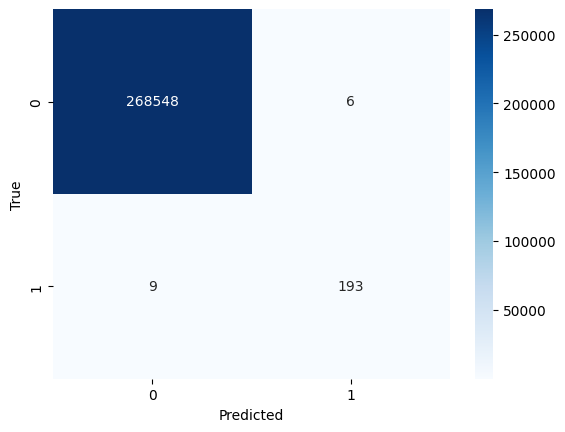

classification report for -  model/model_random_forest_euclidean_bert_distance.sav
[[268552      2]
 [     9    193]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    268554
           1       0.99      0.96      0.97       202

    accuracy                           1.00    268756
   macro avg       0.99      0.98      0.99    268756
weighted avg       1.00      1.00      1.00    268756

Micro-average Precision: 0.9999590706812127
Micro-average Recall: 0.9999590706812127
Micro-average F1-Score: 0.9999590706812127


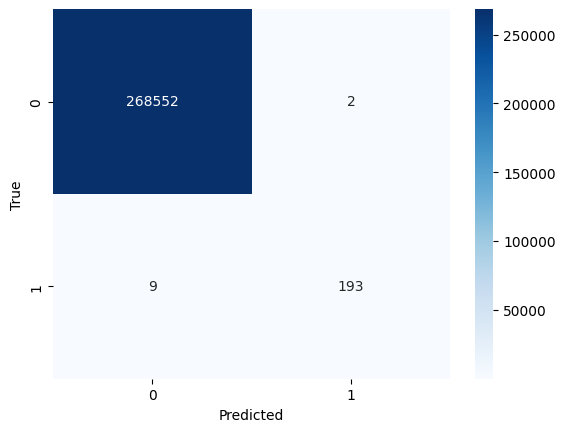

In [4]:
import Prediction_and_Evaluation
from sklearn.model_selection import train_test_split

X = df[['manhattan_distance_emmbading']]
y = df['is_malicious']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Prediction_and_Evaluation.predict_and_evaluation("model/model_random_forest_manhattan_bert_distance.sav",X_test,y_test)
# Define your feature columns and target column
X = df[['euclidean_distance_emmbading']]
y = df['is_malicious']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Prediction_and_Evaluation.predict_and_evaluation("model/model_random_forest_euclidean_bert_distance.sav",X_test,y_test)

In [3]:
new_df = Load_and_Save.load_df("saved_data_frame/new_df_bert_embading_as_columns.pkl")


2023-05-28 17:27:57.021140: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-28 17:27:57.066070: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-28 17:27:57.066889: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

8399/8399 [==============================] - 21s 1ms/step
classification report for -  model/ann_model_bert_embading.pkl
[[268539     15]
 [    14    188]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    268554
           1       0.93      0.93      0.93       202

    accuracy                           1.00    268756
   macro avg       0.96      0.97      0.96    268756
weighted avg       1.00      1.00      1.00    268756

Micro-average Precision: 0.9998920954322881
Micro-average Recall: 0.9998920954322881
Micro-average F1-Score: 0.9998920954322881


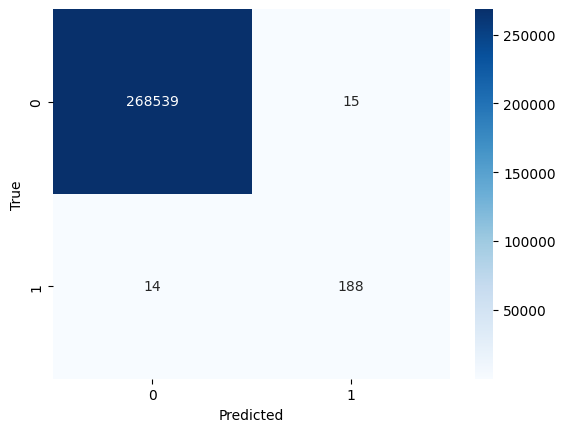

In [4]:
X_train, X_test, y_train, y_test = train_test_split(new_df, df['is_malicious'], test_size=0.2, random_state=42)

Prediction_and_Evaluation.ann_prediction_and_evaluation("model/ann_model_bert_embading.pkl",X_test,y_test)
# Define your feature columns and target column

In [7]:
Load_and_Save.save_df(Load_and_Save.df_to_embading_bert_as_df(df2),"saved_data_frame/new_df2_bert_embading_as_columns.pkl")

In [8]:
new_df2 = Load_and_Save.load_df("saved_data_frame/new_df2_bert_embading_as_columns.pkl")
new_df2.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.050917,-0.024325,-0.246375,-0.534519,0.043343,-0.591485,0.446848,0.796223,-0.435132,0.180946,...,0.724424,-0.100469,0.236052,-0.117394,0.241269,-0.232312,-0.231767,-0.196636,0.747396,0.708774
1,-0.024846,-0.085224,-0.150289,-0.354981,-0.000931,-0.406983,0.645872,0.643267,-0.025955,-0.160001,...,0.690440,-0.418200,-0.157361,-0.113016,0.190721,-0.224829,-0.281933,-0.294186,0.449768,0.602203
2,0.050917,-0.024325,-0.246375,-0.534519,0.043343,-0.591485,0.446848,0.796223,-0.435132,0.180946,...,0.724424,-0.100469,0.236052,-0.117394,0.241269,-0.232312,-0.231767,-0.196636,0.747396,0.708774
3,-0.105693,-0.157623,-0.216807,-0.265791,0.165703,-0.297810,0.334897,0.401280,-0.108203,-0.087493,...,0.294605,-0.127191,-0.249999,-0.093957,0.169114,-0.362599,-0.683719,-0.448452,0.496599,0.616954
4,-0.295040,-0.255300,-0.064031,-0.181698,0.014215,-0.557304,0.426480,0.449044,-0.215085,-0.045447,...,0.552964,-0.001562,-0.133300,-0.254724,-0.014049,0.124293,-0.187537,-0.628159,0.231629,0.890365


In [9]:
X_train, X_test, y_train, y_test = train_test_split(new_df2, df2['is_malicious'], test_size=0.4, random_state=42)

Prediction_and_Evaluation.ann_prediction_and_evaluation("model/ann_model_bert_embading.pkl",X_test,y_test)


2023-05-28 20:23:10.654452: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-28 20:23:10.748520: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-28 20:23:10.749429: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [12]:
print(y_pred)
print(type(y_pred))

# y_pred_classes = np.round(y_pred)
count = 0 
for p in y_pred:
    if p != 1 and p != 0:
        count+=1
        print(p)
print(len(y_pred))

[0 0 0 ... 0 0 0]
<class 'numpy.ndarray'>
528958


In [13]:
print(y_test)
print(type(y_test))

# y_pred_classes = np.round(y_pred)
count = 0 
for p in y_test:
    if p != 1 and p != 0:
        count+=1
        print(p)
print(len(y_test))

[0 0 0 ... 0 0 0]
<class 'numpy.ndarray'>
528958


In [14]:
# Check the unique values in both arrays
unique_pred = np.unique(y_pred)
unique_test = np.unique(y_test)

# Compare the unique values
print("Unique values in y_pred:", unique_pred)
print("Unique values in y_test:", unique_test)

Unique values in y_pred: [0 1]
Unique values in y_test: [0 1]


classification report for -  model/model_random_forest_euclidean_bert_distance.sav
[[528461     11]
 [    27    459]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    528472
           1       0.98      0.94      0.96       486

    accuracy                           1.00    528958
   macro avg       0.99      0.97      0.98    528958
weighted avg       1.00      1.00      1.00    528958

Micro-average Precision: 0.9999281606479153
Micro-average Recall: 0.9999281606479153
Micro-average F1-Score: 0.9999281606479153


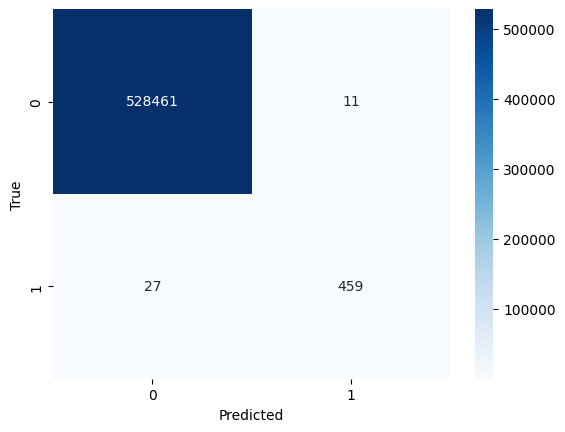

In [11]:
import Prediction_and_Evaluation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2[["euclidean_distance_emmbading"]], df2['is_malicious'].values.ravel(), test_size=0.4, random_state=42)
#euclidean_distance
Prediction_and_Evaluation.predict_and_evaluation("model/model_random_forest_euclidean_bert_distance.sav",X_test,y_test)


classification report for -  euclidean_distance df2 random forest model
[[528461     11]
 [    27    459]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    528472
           1       0.98      0.94      0.96       486

    accuracy                           1.00    528958
   macro avg       0.99      0.97      0.98    528958
weighted avg       1.00      1.00      1.00    528958

Micro-average Precision: 0.9999281606479153
Micro-average Recall: 0.9999281606479153
Micro-average F1-Score: 0.9999281606479153


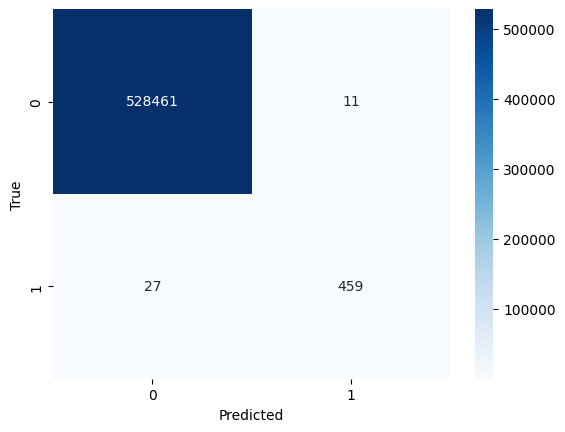

In [15]:
import numpy as np
Prediction_and_Evaluation.get_visual_classification_report(y_test.astype(int),y_pred.astype(int),"euclidean_distance df2 random forest model")
# Prediction_and_Evaluation.get_visual_classification_report(np.array(y_test),np.array(y_pred),"euclidean_distance df2 random forest model")

classification report for -  model/model_random_forest_manhattan_bert_distance_n.sav
[[528462     10]
 [    27    459]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    528472
           1       0.98      0.94      0.96       486

    accuracy                           1.00    528958
   macro avg       0.99      0.97      0.98    528958
weighted avg       1.00      1.00      1.00    528958

Micro-average Precision: 0.9999300511571807
Micro-average Recall: 0.9999300511571807
Micro-average F1-Score: 0.9999300511571807


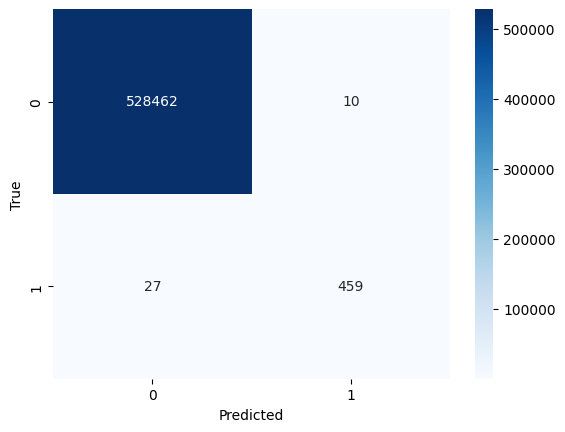

In [7]:
import Prediction_and_Evaluation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2[["manhattan_distance_emmbading"]], df2['is_malicious'], test_size=0.4, random_state=42)

# manhattan_distance
Prediction_and_Evaluation.predict_and_evaluation("model/model_random_forest_manhattan_bert_distance_n.sav",X_test,y_test)

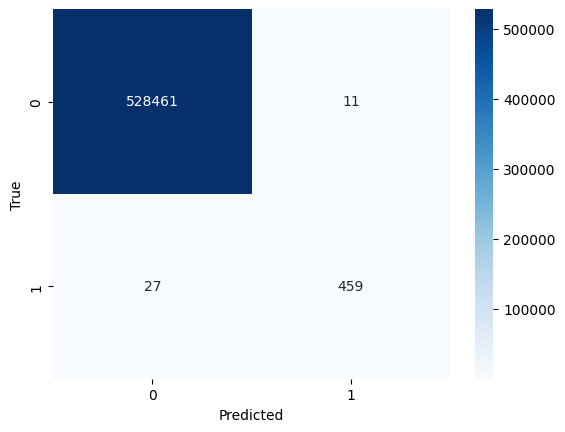

In [13]:
import sys
import Prediction_and_Evaluation
from sklearn.model_selection import train_test_split

# Define the path to the output file
output_file = 'output.txt'

# Create a context manager to redirect prints to a file
class PrintToFile:
    def __init__(self, filename):
        self.filename = filename
        self.terminal = sys.stdout

    def __enter__(self):
        self.file = open(self.filename, 'w')
        sys.stdout = self.file

    def __exit__(self, exc_type, exc_value, traceback):
        sys.stdout = self.terminal
        self.file.close()
        
with PrintToFile(output_file):
    X_train, X_test, y_train, y_test = train_test_split(df2[["euclidean_distance_emmbading"]], df2['is_malicious'].values.ravel(), test_size=0.4, random_state=42)
    #euclidean_distance
    Prediction_and_Evaluation.predict_and_evaluation("model/model_random_forest_euclidean_bert_distance.sav",X_test,y_test)
